# **Capstone Project**

# IBM/Coursera Applied Data Science Certification 

## Table of contents
* [Project Background and business case](#introduction)
* [Data and Methodology](#data)
* [Data Wrangling](#wrangling)
* [Analysis](#analysis)
* [Results and Conclusions](#results)
* [Conclusion](#conclusion)

# Project background and business case <a name="introduction"></a>

London is made up of 33 boroughs with relatively important differences between areas.

The analysis aims to assist young families to help identify suitable residential areas in London, UK. Though preferences as to the most suitable residental areas certainly vary, we assume that a certain number of key "requirements" will be shared across families with young children.

# Data and Methodology  <a name="methodology"></a>

The project will aim to rely on the following data sources:

*   Foursquare:  
    The API will be used to identify areas with higher 
    number of child-friendly entertainment options,   
    parks and malls. 
    (Source: Foursquare API)

*   School Database:
    The school types as well as the number of students in each school type per Borough.  
    (Source: data.london.gov.uk)

*   Economic Indicators:
    Borough economic indicators as defined by its mean disposable income.    
    (Source: data.london.gov.uk)

**The highlights of the cleaned data are herewith:**


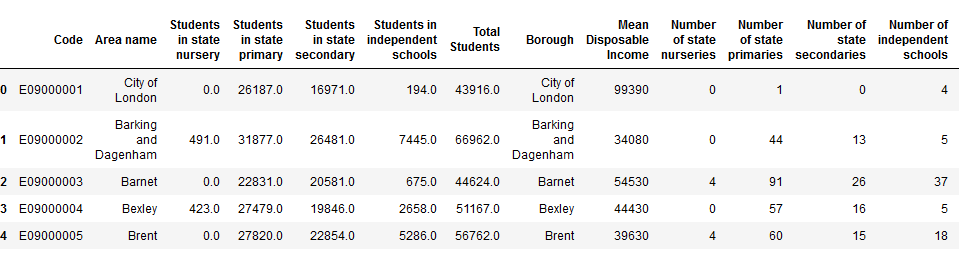

# Data Wrangling  <a name="wrangling"></a>

In [1]:
import pandas as pd
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns
import scipy as stats
import json # library to handle JSON files
import requests # library to handle requests
import matplotlib as plt
import matplotlib.colors as colors
import scipy as stats
import folium

In [2]:
#Import the Data
df_students = pd.read_excel("Students.xlsx")
df_income = pd.read_excel("Income.xlsx")
df_schools = pd.read_excel("Schools.xlsx")
df_ofsted= pd.read_excel("Ofsed.xlsx")

In [3]:
#Merge the data to create a single combined data

df1 = pd.merge(df_students, df_income, on='Code')
df2 = pd.merge(df1, df_schools, on='Code')
df3 = pd.merge(df2, df_ofsted, on='Code')
df = df3
df.head()

,Code,Area name_x,State-funded nursery_x,State-funded primary (2)(3),State-funded secondary (2)(4),State-funded (5),Non-maintained_x,Total_x,Pupil referral units (6),Independent_x,...,State-funded secondary (1)(3),State-funded (4),Non-maintained_y,Total_y,Pupil referral units (5),Independent_y,All schools_y,Area name_y,Ofsed Excellent,% of Students Good or Excellent Schools
0,E09000001,City of London,0.0,26187.0,16971.0,443.0,0.0,443.0,121.0,194.0,...,0,0,0,0,0,4,5,City of London,11,81
1,E09000002,Barking and Dagenham,491.0,31877.0,26481.0,585.0,0.0,585.0,83.0,7445.0,...,13,2,0,2,1,5,65,Barking and Dagenham,3,62
2,E09000003,Barnet,0.0,22831.0,20581.0,506.0,0.0,506.0,31.0,675.0,...,26,6,0,6,2,37,166,Barnet,24,89
3,E09000004,Bexley,423.0,27479.0,19846.0,711.0,0.0,711.0,50.0,2658.0,...,16,5,0,5,1,5,84,Bexley,3,83
4,E09000005,Brent,0.0,27820.0,22854.0,705.0,0.0,705.0,97.0,5286.0,...,15,4,0,4,2,18,103,Brent,10,76


In [4]:
#Renaming columns to make them easier to read
df.rename(columns={'Area name_x':'Area Name'}, inplace=True)
df.rename(columns={'State-funded nursery_x':'Students in state nursery'}, inplace=True)
df.rename(columns={'State-funded primary (2)(3)':'Students in state primary'}, inplace=True)
df.rename(columns={'State-funded secondary (2)(4)':'Students in state secondary'}, inplace=True)
df.rename(columns={'Independent_x':'Students in independent schools'}, inplace=True)
df.rename(columns={'All schools_x':'Total Students'}, inplace=True)
df.rename(columns={'2012/13':'Mean Disposable Income'}, inplace=True)
df.rename(columns={'State-funded nursery_y':'Number of state nurseries'}, inplace=True)
df.rename(columns={'State-funded primary (1)(2)':'Number of state primaries'}, inplace=True)
df.rename(columns={'State-funded secondary (1)(3)':'Number of state secondaries'}, inplace=True)
df.rename(columns={'Independent_y':'Number of independent schools'}, inplace=True)
df.rename(columns={'All schools_y':'Total Schools'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Code                                     33 non-null     object 
 1   Area Name                                33 non-null     object 
 2   Students in state nursery                32 non-null     float64
 3   Students in state primary                32 non-null     float64
 4   Students in state secondary              32 non-null     float64
 5   State-funded (5)                         32 non-null     float64
 6   Non-maintained_x                         32 non-null     float64
 7   Total_x                                  32 non-null     float64
 8   Pupil referral units (6)                 32 non-null     float64
 9   Students in independent schools          32 non-null     float64
 10  Total Students                           32 non-null

In [27]:
# After reviewing the datatypes, we have to convert the selected datatypes. 
df["Mean Disposable Income"] = df["Mean Disposable Income"].astype(float)

In [5]:
# We need to drop a few columns that we will not be using in this analysis. 
df.drop(['State-funded (5)', 'Non-maintained_x', 'Total_x', 'Pupil referral units (6)'], axis=1, inplace=True)
df.drop(['State-funded (4)', 'Non-maintained_y', 'Total_y', 'Non-maintained_y', 'Pupil referral units (5)'], axis=1, inplace=True)      
df.head(5)

,Code,Area Name,Students in state nursery,Students in state primary,Students in state secondary,Students in independent schools,Total Students,Borough,Mean Disposable Income,Number of state nurseries,Number of state primaries,Number of state secondaries,Number of independent schools,Total Schools,Area name_y,Ofsed Excellent,% of Students Good or Excellent Schools
0,E09000001,City of London,0.0,26187.0,16971.0,194.0,43916.0,City of London,99390,0,1,0,4,5,City of London,11,81
1,E09000002,Barking and Dagenham,491.0,31877.0,26481.0,7445.0,66962.0,Barking and Dagenham,34080,0,44,13,5,65,Barking and Dagenham,3,62
2,E09000003,Barnet,0.0,22831.0,20581.0,675.0,44624.0,Barnet,54530,4,91,26,37,166,Barnet,24,89
3,E09000004,Bexley,423.0,27479.0,19846.0,2658.0,51167.0,Bexley,44430,0,57,16,5,84,Bexley,3,83
4,E09000005,Brent,0.0,27820.0,22854.0,5286.0,56762.0,Brent,39630,4,60,15,18,103,Brent,10,76


In [6]:
#Open the coordinates file and get the coordinates for each of the boroughs
df_coordinates = pd.read_excel("Coordinates.xlsx")
df_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Borough     33 non-null     object 
 1   Population  33 non-null     int64  
 2   Latitude    33 non-null     object 
 3   Longitude   33 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [7]:
#As the coordinates have certain characters that we will not be using, these need to be removed. 
df_coordinates["Latitude"] = df_coordinates["Latitude"].str.replace('°N', '')
df_coordinates["Latitude"] = df_coordinates["Latitude"].str.replace('°S', '')
#df_coordinates["Longitude"] = df_coordinates["Longitude"].str.replace('°E', '')
#df_coordinates["Longitude"] = df_coordinates["Longitude"].str.replace('°W', '')
df_coordinates.head(5)

,Borough,Population,Latitude,Longitude
0,City of London,9721,51.5155,-0.0922
1,Barking and Dagenham,212906,51.5607,0.1557
2,Barnet,395896,51.6252,-0.1517
3,Bexley,248287,51.4549,0.1505
4,Brent,329771,51.5588,-0.2817


In [8]:
#We need to convert the coordinate strings to float variables
df_coordinates["Latitude"] = df_coordinates["Latitude"].astype(float)
df_coordinates["Longitude"] = df_coordinates["Longitude"].astype(float)
df_coordinates.head()

,Borough,Population,Latitude,Longitude
0,City of London,9721,51.5155,-0.0922
1,Barking and Dagenham,212906,51.5607,0.1557
2,Barnet,395896,51.6252,-0.1517
3,Bexley,248287,51.4549,0.1505
4,Brent,329771,51.5588,-0.2817


In [9]:
#We can now merge the coordinates file into the initial data. 
df_complete = pd.merge(df, df_coordinates, on='Borough')
df_complete.head(5)

,Code,Area Name,Students in state nursery,Students in state primary,Students in state secondary,Students in independent schools,Total Students,Borough,Mean Disposable Income,Number of state nurseries,Number of state primaries,Number of state secondaries,Number of independent schools,Total Schools,Area name_y,Ofsed Excellent,% of Students Good or Excellent Schools,Population,Latitude,Longitude
0,E09000001,City of London,0.0,26187.0,16971.0,194.0,43916.0,City of London,99390,0,1,0,4,5,City of London,11,81,9721,51.5155,-0.0922
1,E09000002,Barking and Dagenham,491.0,31877.0,26481.0,7445.0,66962.0,Barking and Dagenham,34080,0,44,13,5,65,Barking and Dagenham,3,62,212906,51.5607,0.1557
2,E09000003,Barnet,0.0,22831.0,20581.0,675.0,44624.0,Barnet,54530,4,91,26,37,166,Barnet,24,89,395896,51.6252,-0.1517
3,E09000004,Bexley,423.0,27479.0,19846.0,2658.0,51167.0,Bexley,44430,0,57,16,5,84,Bexley,3,83,248287,51.4549,0.1505
4,E09000005,Brent,0.0,27820.0,22854.0,5286.0,56762.0,Brent,39630,4,60,15,18,103,Brent,10,76,329771,51.5588,-0.2817


# Data Analysis  <a name="analysis"></a>

The UK school system is largely split across the public (state-funded) and private (independent) institutions at the primary and secondary levels. It is reported that in general, independent schools tend to receive a higher grade by the UK Education Authority (Ofsed) as their public counterparts.  

Initially, we will first calculate the proportion of students in each of the categories.

In [11]:
# Let's calculate the proportion of students in state primary and independent schools
df_complete["Proportion in State Primary"] = df_complete["Students in state primary"] / df_complete["Total Students"]
df_complete["Proportion in Independent"] = df_complete["Students in independent schools"] / df_complete["Total Students"] 
df_complete["Proportion of State Schools"] = df_complete["Number of state primaries"] / df_complete["Total Schools"]
df_complete["Proportion in Independent Schools"] = df_complete["Number of independent schools"] / df_complete["Total Schools"] 
df_complete.head(5)

,Code,Area Name,Students in state nursery,Students in state primary,Students in state secondary,Students in independent schools,Total Students,Borough,Mean Disposable Income,Number of state nurseries,...,Area name_y,Ofsed Excellent,% of Students Good or Excellent Schools,Population,Latitude,Longitude,Proportion in State Primary,Proportion in Independent,Proportion of State Schools,Proportion in Independent Schools
0,E09000001,City of London,0.0,26187.0,16971.0,194.0,43916.0,City of London,99390,0,...,City of London,11,81,9721,51.5155,-0.0922,0.596297,0.004418,0.200000,0.800000
1,E09000002,Barking and Dagenham,491.0,31877.0,26481.0,7445.0,66962.0,Barking and Dagenham,34080,0,...,Barking and Dagenham,3,62,212906,51.5607,0.1557,0.476046,0.111182,0.676923,0.076923
2,E09000003,Barnet,0.0,22831.0,20581.0,675.0,44624.0,Barnet,54530,4,...,Barnet,24,89,395896,51.6252,-0.1517,0.511631,0.015126,0.548193,0.222892
3,E09000004,Bexley,423.0,27479.0,19846.0,2658.0,51167.0,Bexley,44430,0,...,Bexley,3,83,248287,51.4549,0.1505,0.537045,0.051948,0.678571,0.059524
4,E09000005,Brent,0.0,27820.0,22854.0,5286.0,56762.0,Brent,39630,4,...,Brent,10,76,329771,51.5588,-0.2817,0.490117,0.093126,0.582524,0.174757


We can do a very quick analysis to understand the distribution "Excellent" schools.  The below histogram shows that on average, each borough will have around **10-12** schools rated as "Excellent".  

Text(0.5, 1.0, 'Distribution of schools with Excellent rating')

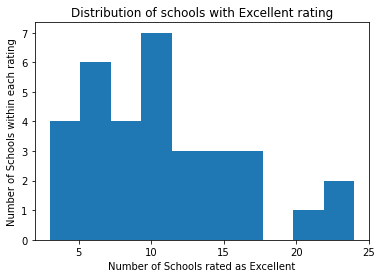

In [30]:
plt.pyplot.hist(df_complete["Ofsed Excellent"])
plt.pyplot.xlabel('Number of Schools rated as Excellent')
plt.pyplot.ylabel('Number of Schools within each rating')
plt.pyplot.title('Distribution of schools with Excellent rating')

Let's also analyse key areas and compare each Borough.  To make our analysis easier, we will just focus on the top 15 within each category of analysis.

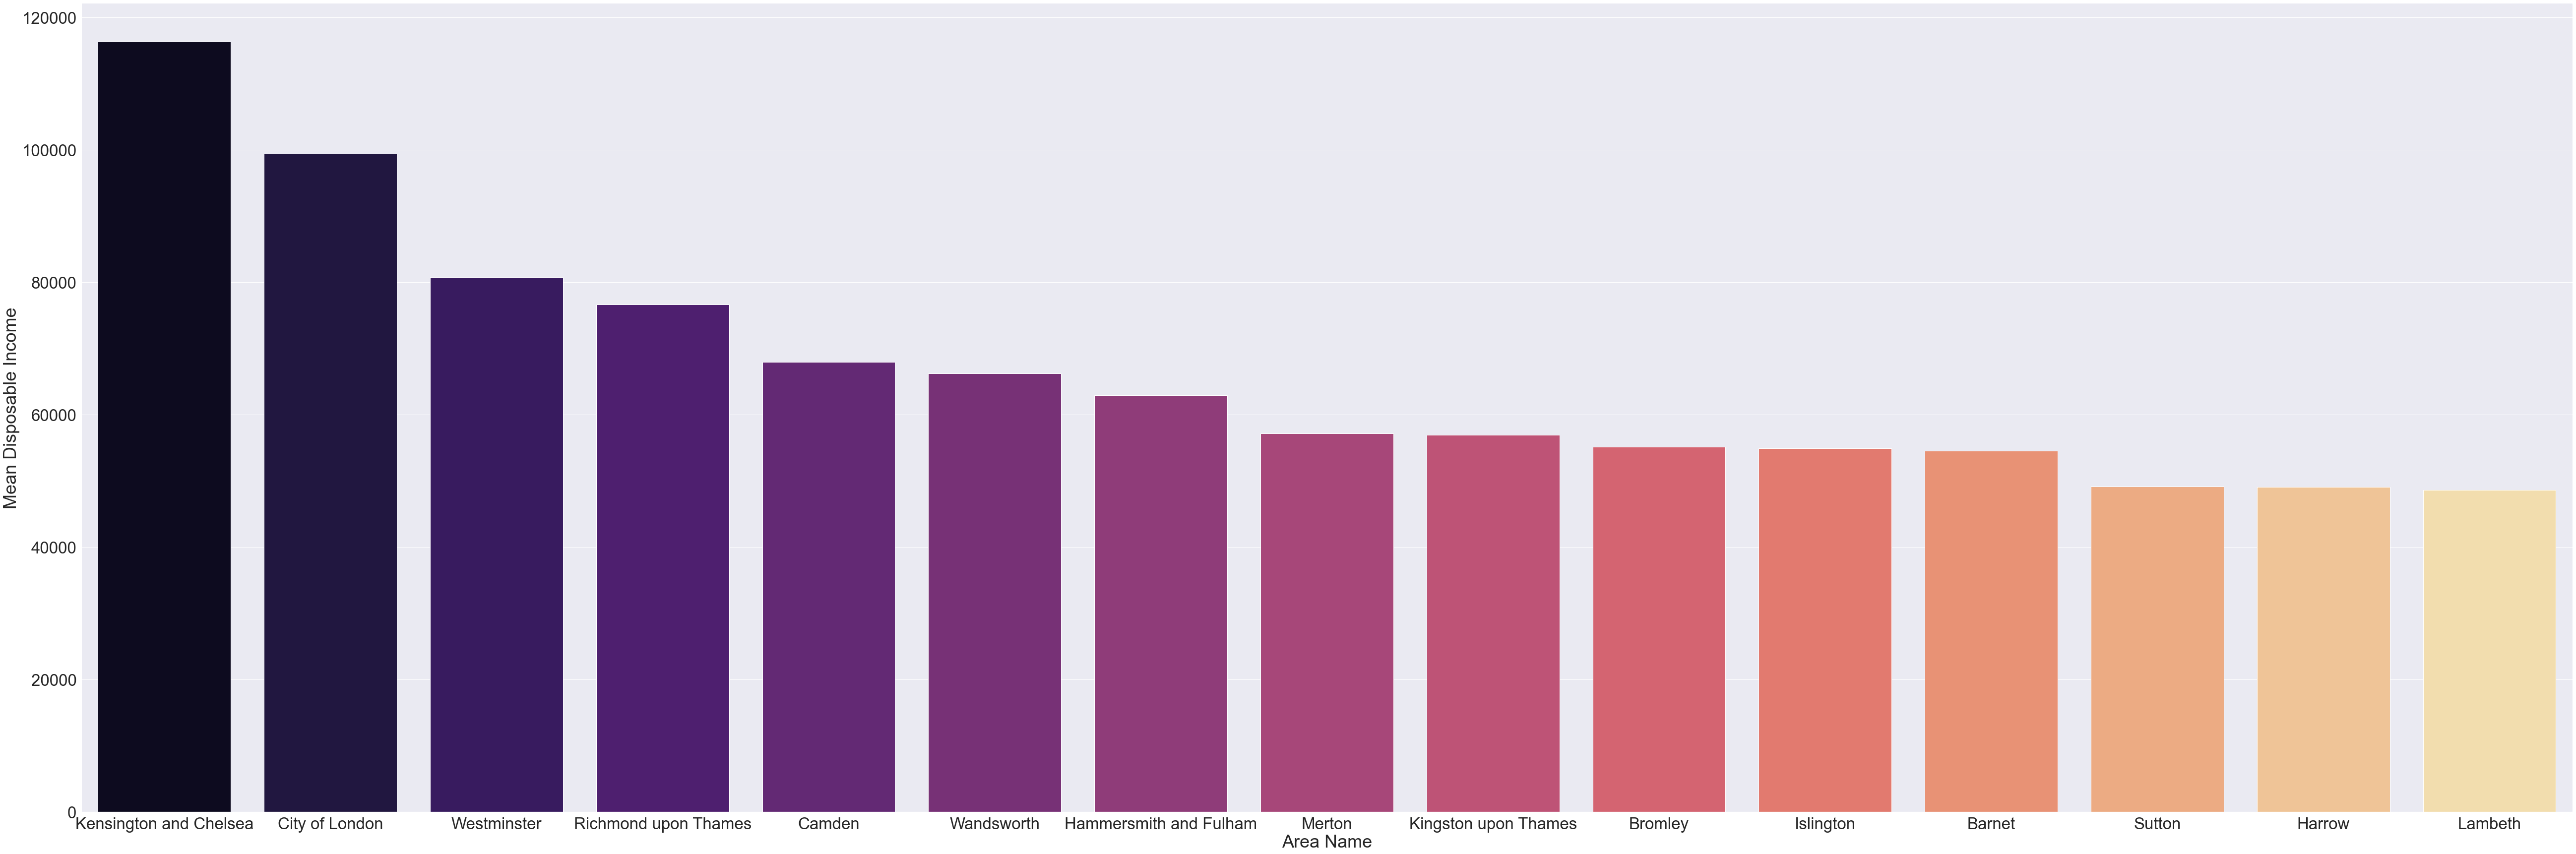

In [31]:
# Let's evaluate the top 15 boroughs by mean disposable income 
df_top15_income = df_complete.nlargest(15, 'Mean Disposable Income')
sns.set(rc={'figure.figsize':(90,30)})
sns.set(font_scale=3)
ax = sns.barplot(data=df_top15_income, x='Area Name', y='Mean Disposable Income', order=df_top15_income.sort_values('Mean Disposable Income', ascending=False).Borough, palette = 'magma')

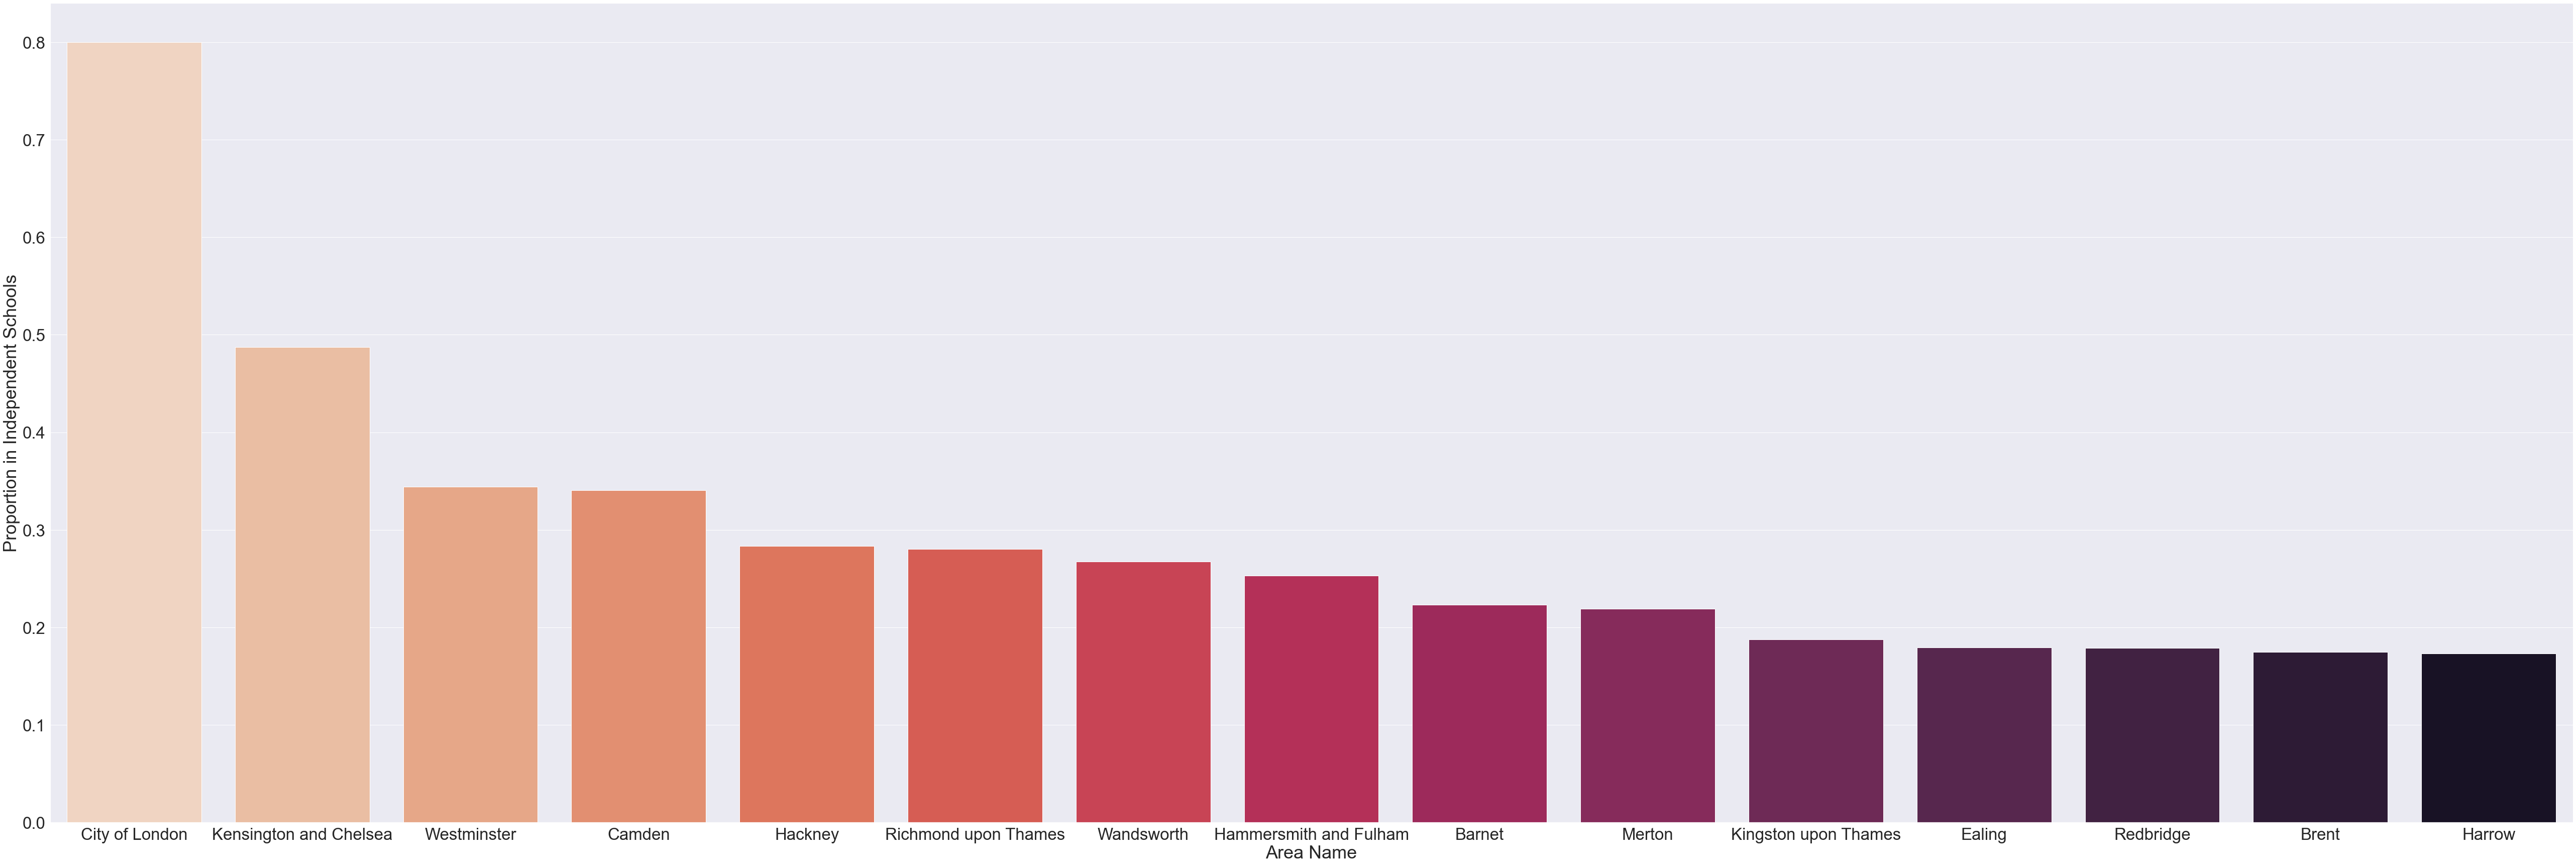

In [35]:
# We will look at the boroughs with the highest number of students in independent schools 
df_top15_independent =  df_complete.nlargest(15, 'Proportion in Independent Schools')
plt.pyplot.figure(figsize=(90,30))
sns.set(font_scale=3)
ax = sns.barplot(data=df_top15_independent, x='Area Name', y='Proportion in Independent Schools', order=df_top15_independent.sort_values('Proportion in Independent Schools', ascending=False).Borough, palette = 'rocket_r')

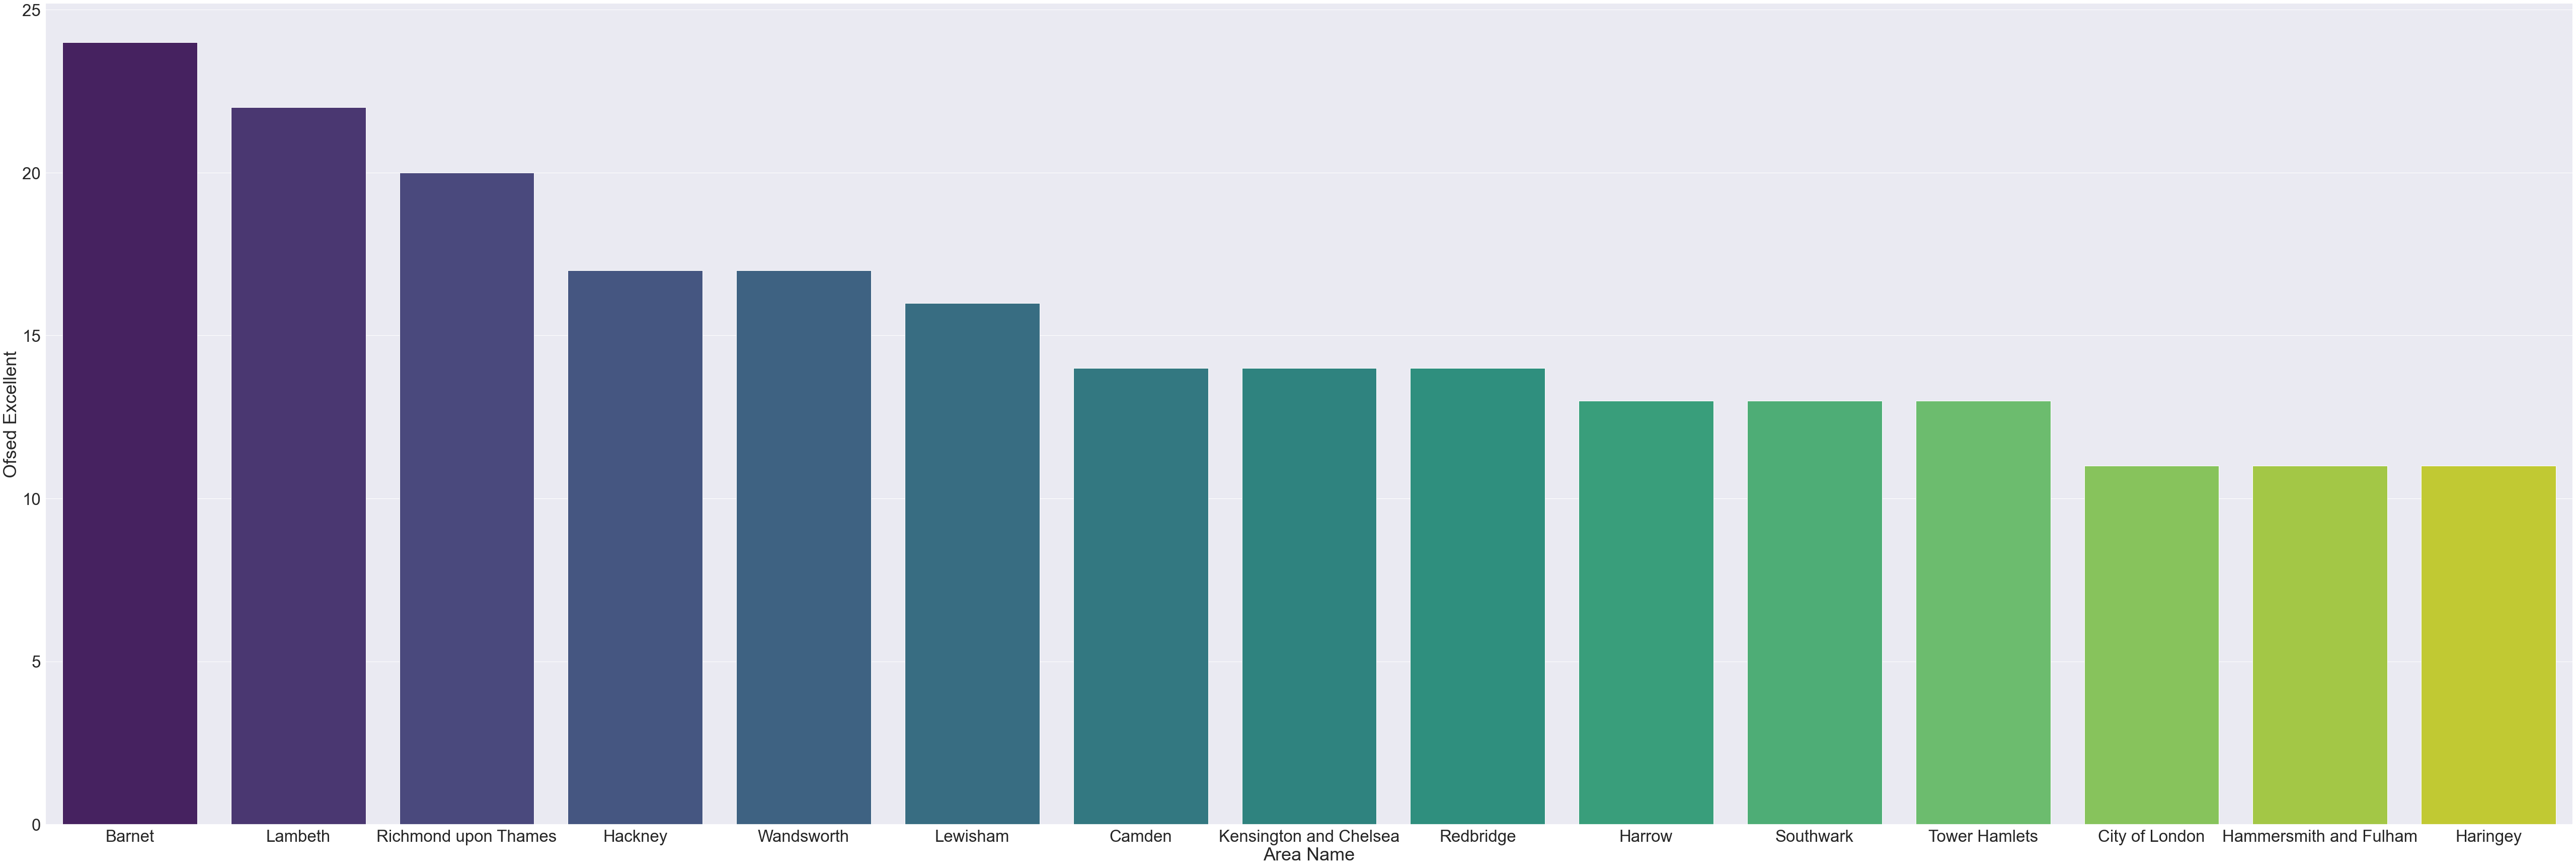

In [33]:
# We will look at the highest number of schools per borough rated either good or excellent. 
df_top15_schools = df_complete.nlargest(15, 'Ofsed Excellent')
plt.pyplot.figure(figsize=(90,30))
sns.set(font_scale=3)
ax = sns.barplot(data=df_top15_schools, x='Area Name', y='Ofsed Excellent', order=df_top15_schools.sort_values('Ofsed Excellent', ascending=False).Borough , palette = 'viridis')

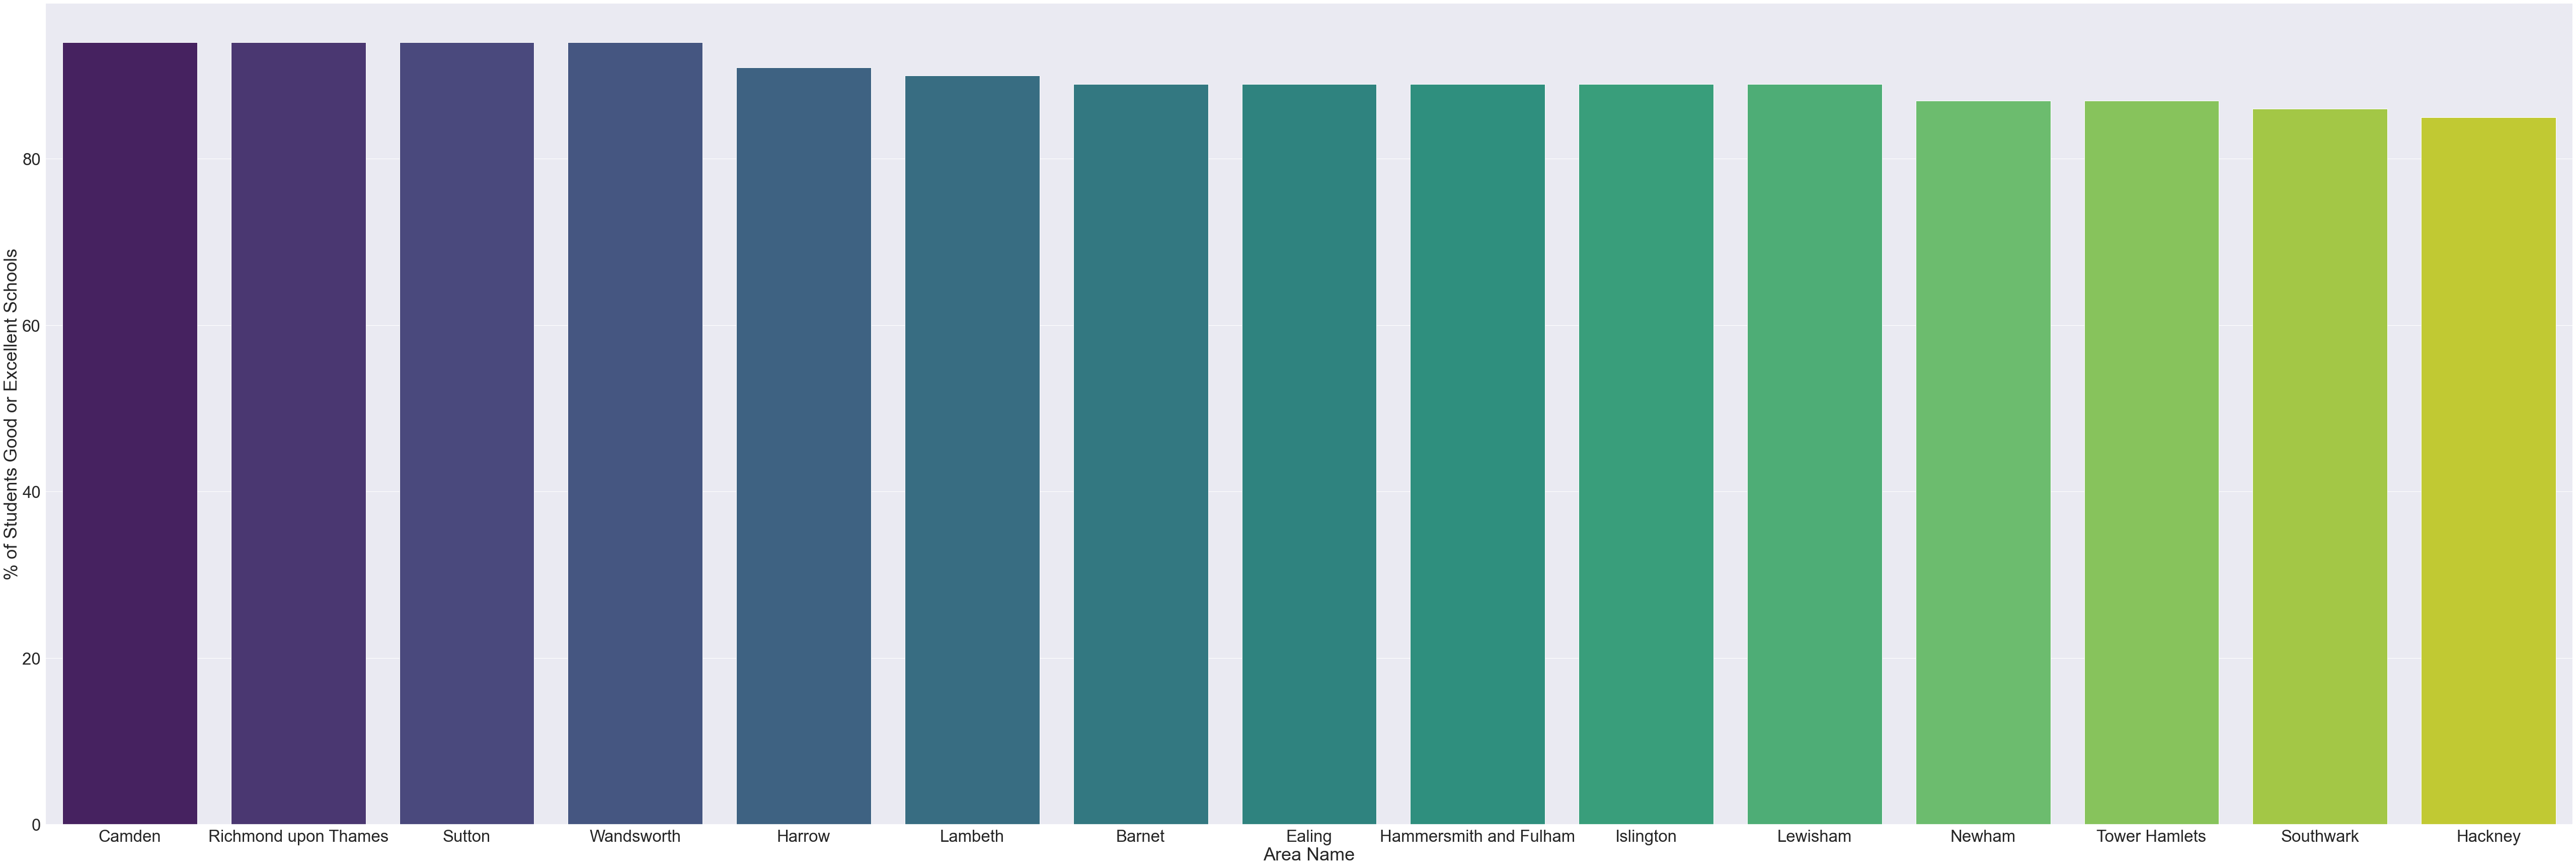

In [37]:
# We will look at the boroughs with the highest % of students in schools rated Good or Excellent.  
df_top15_studentsintopschools = df_complete.nlargest(15, '% of Students Good or Excellent Schools')
plt.pyplot.figure(figsize=(90,30))
sns.set(font_scale=3)
ax = sns.barplot(data=df_top15_studentsintopschools, x='Area Name', y='% of Students Good or Excellent Schools', order=df_top15_studentsintopschools.sort_values('% of Students Good or Excellent Schools', ascending=False).Borough , palette = 'viridis')

We will use mapping visualisations tools to display some of the data analysed above. 

In [39]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from folium import plugins
from folium.plugins import HeatMap
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [40]:
address = 'London'
geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [141]:
# We just create a mapping visual of all the Boroughs in London. 

map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Borough in zip(df_complete['Latitude'], df_complete['Longitude'], df_complete['Borough']):
    label = '{}'.format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
map_london

Previously, we have also identified the % of students in "Good" or "Excellent" schools in each Borough. Though the above group indicates the general standing of schools per Borough, ultimately we wish to understand what % of students get to attend these institutions. These data points are highlighted in Red. As noted, there is a fairly significant overlap with the top 15 schools. 

In [237]:
# Create a map of the top 15 schools (as rated by the UK Education Authority) previously reported on and analysed. 
map_london2 = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.TileLayer('cartodbpositron').add_to(map_london) #cartodbpositron cartodbdark_matter
#HeatMap().add_to(school_map_london)

# add markers to map
for lat, lng, Borough in zip(df_top15_studentsintopschools['Latitude'], df_top15_studentsintopschools['Longitude'], df_top15_studentsintopschools['Borough']):
    label = '{}'.format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        parse_html=False).add_to(map_london2)  
map_london2

Based on the above graph, we can now visualise that boroughs with a relatively high % of students attending Good or Excellent schools.  We can now superimpose the Boroughs that have the best schools in yellow. Based on the below graph, we do see there is quiet a significant overlap between the two variables. 

In [241]:
# add markers to map
map_london3 = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, Borough in zip(df_top15_schools['Latitude'], df_top15_schools['Longitude'], df_top15_schools['Borough']):
    label = '{}'.format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=1,
        parse_html=False).add_to(map_london2)  
map_london2

We will now need to capture and analyse the data of potential areas of interest to review against the school data highlighted above. We will use the Foursquare API for this purpose. 

In [50]:
#Define Foursquare credentials

CLIENT_ID = 'WD0FC5WVUL3SS404ZVHJEPFGW4L310PRJ51ZHSIGJFB1M4D1' # your Foursquare ID
CLIENT_SECRET = 'TSOOUBQLXPK5KJQ1GKKOMASD1U35FNO0IW1WRHWYPIN5IOX3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WD0FC5WVUL3SS404ZVHJEPFGW4L310PRJ51ZHSIGJFB1M4D1
CLIENT_SECRET:TSOOUBQLXPK5KJQ1GKKOMASD1U35FNO0IW1WRHWYPIN5IOX3


In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [215]:
London_venues = getNearbyVenues(names=df_complete['Borough'],
                                  latitudes=df_complete['Latitude'],
                                  longitudes=df_complete['Longitude'])

City of London
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


We have now obtained the data from Foursquare for each of the London boroughs, including the key area of interest we are looking to investigate further, namely the "Venue Category". 

In [216]:
# We will quickly check the data headers. 
London_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.5155,-0.0922,The Ned Hotel,51.513755,-0.090067,Hotel
1,City of London,51.5155,-0.0922,The Merchant House,51.513264,-0.093039,Cocktail Bar
2,City of London,51.5155,-0.0922,Goodman Steak House Restaurant,51.514398,-0.090745,Steakhouse
3,City of London,51.5155,-0.0922,Hawksmoor Guildhall,51.515498,-0.090849,Steakhouse
4,City of London,51.5155,-0.0922,Daunt Books,51.513982,-0.092995,Bookstore


We will review the venue categories and identify the ones that would be considered family friendly:  These are deemed to be the following: Arts & Crafts Store, Athletics & Sports, Bakery, Bike Shop, Bookstore, Botanical Garden, Bubble Tea Shop, Café, Candy Store, Park, Performing Arts Venue, Market

In [263]:
venues_of_interest = {'Arts & Crafts Store', 'Bakery', 'Bookstore', 'Botanical Garden', 'Bubble Tea Shop', 'Café', 'Garden', 'Grocery Store', 'Park', 'Market', 'Church','Event Space','Performing Arts Venue'}
df_venues = London_venues[London_venues['Venue Category'].isin(venues_of_interest)]
df_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,City of London,51.5155,-0.0922,Daunt Books,51.513982,-0.092995,Bookstore
6,City of London,51.5155,-0.0922,M&S Simply Food,51.513590,-0.095297,Grocery Store
14,City of London,51.5155,-0.0922,Barbican Centre,51.519855,-0.093942,Performing Arts Venue
15,City of London,51.5155,-0.0922,Postman's Park,51.516860,-0.097643,Park
16,City of London,51.5155,-0.0922,Drapers' Hall,51.515009,-0.086227,Event Space


In [264]:
# Analyze each neighborhood using one hot encoding
London_onehot = pd.get_dummies(df_venues['Venue Category'])

# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = df_venues['Neighborhood'] 
London_onehot['Latitude'] = df_venues['Neighborhood Latitude'] 
London_onehot['Longitude'] = df_venues['Neighborhood Longitude'] 

London_onehot.head(5)

,Arts & Crafts Store,Bakery,Bookstore,Botanical Garden,Bubble Tea Shop,Café,Church,Event Space,Garden,Grocery Store,Market,Park,Performing Arts Venue,Neighborhood,Latitude,Longitude
4,0,0,1,0,0,0,0,0,0,0,0,0,0,City of London,51.5155,-0.0922
6,0,0,0,0,0,0,0,0,0,1,0,0,0,City of London,51.5155,-0.0922
14,0,0,0,0,0,0,0,0,0,0,0,0,1,City of London,51.5155,-0.0922
15,0,0,0,0,0,0,0,0,0,0,0,1,0,City of London,51.5155,-0.0922
16,0,0,0,0,0,0,0,1,0,0,0,0,0,City of London,51.5155,-0.0922


We now have an Borough-by-Borough breakdown of the key "family-friendly" venues. 

In [265]:
df_grouped = London_onehot.groupby('Neighborhood').max().reset_index()
df_grouped.head(5)

,Neighborhood,Arts & Crafts Store,Bakery,Bookstore,Botanical Garden,Bubble Tea Shop,Café,Church,Event Space,Garden,Grocery Store,Market,Park,Performing Arts Venue,Latitude,Longitude
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,1,0,1,0,51.5607,0.1557
1,Barnet,0,0,0,0,0,1,0,0,0,0,0,1,0,51.6252,-0.1517
2,Bexley,0,1,0,0,0,0,0,0,0,0,0,0,0,51.4549,0.1505
3,Brent,0,1,0,0,1,1,0,0,0,1,0,1,0,51.5588,-0.2817
4,Bromley,0,1,1,0,0,1,0,0,0,1,0,1,0,51.4039,0.0198


In [266]:
# Change the value types to integer so that these can be properly added up later on in the analysis. 
df_grouped["Arts & Crafts Store"] = df_grouped["Arts & Crafts Store"].astype('int64')
df_grouped["Bakery"] = df_grouped["Bakery"].astype('int64')
df_grouped["Bookstore"]= df_grouped["Bookstore"].astype('int64')
df_grouped["Botanical Garden"] = df_grouped["Botanical Garden"].astype('int64') 
df_grouped["Bubble Tea Shop"] = df_grouped["Bubble Tea Shop"].astype('int64') 
df_grouped["Café"] = df_grouped["Café"].astype('int64') 
df_grouped["Grocery Store"] = df_grouped["Grocery Store"].astype('int64')
df_grouped["Church"] = df_grouped["Church"].astype('int64') 
df_grouped["Garden"] = df_grouped["Garden"].astype('int64')
df_grouped["Market"] = df_grouped["Market"].astype('int64')
df_grouped["Park"] = df_grouped["Park"].astype('int64')
df_grouped["Event Space"] = df_grouped["Event Space"].astype('int64')
df_grouped["Performing Arts Venue"] = df_grouped["Performing Arts Venue"].astype('int64')

In [267]:
# Rename column headers to ensure easier analysis
df_grouped=df_grouped.rename(columns={"Arts & Crafts Store": "Arts", "Café": "Cafe", "Botanical Garden": "Botanical", "Bubble Tea Shop": "Tea", "Grocery Store":"Grocery", "Event Space":"Events", "Performing Arts Venue": "Performance"})

In [268]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  32 non-null     object 
 1   Arts          32 non-null     int64  
 2   Bakery        32 non-null     int64  
 3   Bookstore     32 non-null     int64  
 4   Botanical     32 non-null     int64  
 5   Tea           32 non-null     int64  
 6   Cafe          32 non-null     int64  
 7   Church        32 non-null     int64  
 8   Events        32 non-null     int64  
 9   Garden        32 non-null     int64  
 10  Grocery       32 non-null     int64  
 11  Market        32 non-null     int64  
 12  Park          32 non-null     int64  
 13  Performance   32 non-null     int64  
 14  Latitude      32 non-null     float64
 15  Longitude     32 non-null     float64
dtypes: float64(2), int64(13), object(1)
memory usage: 4.1+ KB


We now can create a "total" column to create a total number of venues of interest per Borough. 

In [269]:
df_grouped['Total Score']= df_grouped['Performance']+df_grouped['Park']+df_grouped['Market']+df_grouped['Grocery']+df_grouped['Garden'] + df_grouped['Church']+ df_grouped['Cafe']+ df_grouped['Events']+ df_grouped['Tea']+ df_grouped['Botanical']+ df_grouped['Bookstore']+ df_grouped['Bakery']+ df_grouped['Arts']
df_grouped.head(10)

,Neighborhood,Arts,Bakery,Bookstore,Botanical,Tea,Cafe,Church,Events,Garden,Grocery,Market,Park,Performance,Latitude,Longitude,Total Score
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,1,0,1,0,51.5607,0.1557,2
1,Barnet,0,0,0,0,0,1,0,0,0,0,0,1,0,51.6252,-0.1517,2
2,Bexley,0,1,0,0,0,0,0,0,0,0,0,0,0,51.4549,0.1505,1
3,Brent,0,1,0,0,1,1,0,0,0,1,0,1,0,51.5588,-0.2817,5
4,Bromley,0,1,1,0,0,1,0,0,0,1,0,1,0,51.4039,0.0198,5
5,Camden,0,1,1,0,0,1,1,1,1,1,1,1,0,51.5290,-0.1255,9
6,City of London,0,1,1,1,0,0,1,1,1,1,1,1,1,51.5155,-0.0922,10
7,Croydon,0,1,1,0,0,1,0,0,0,0,0,1,0,51.3714,-0.0977,4
8,Ealing,0,1,1,0,0,1,0,0,0,1,0,1,1,51.5130,-0.3089,6
9,Enfield,0,1,1,0,0,1,0,0,0,1,0,1,0,51.6538,-0.0799,5


As a quick visual, we can quickly check which Boroughs have the highest scores in the "family friendly" venue categories. 

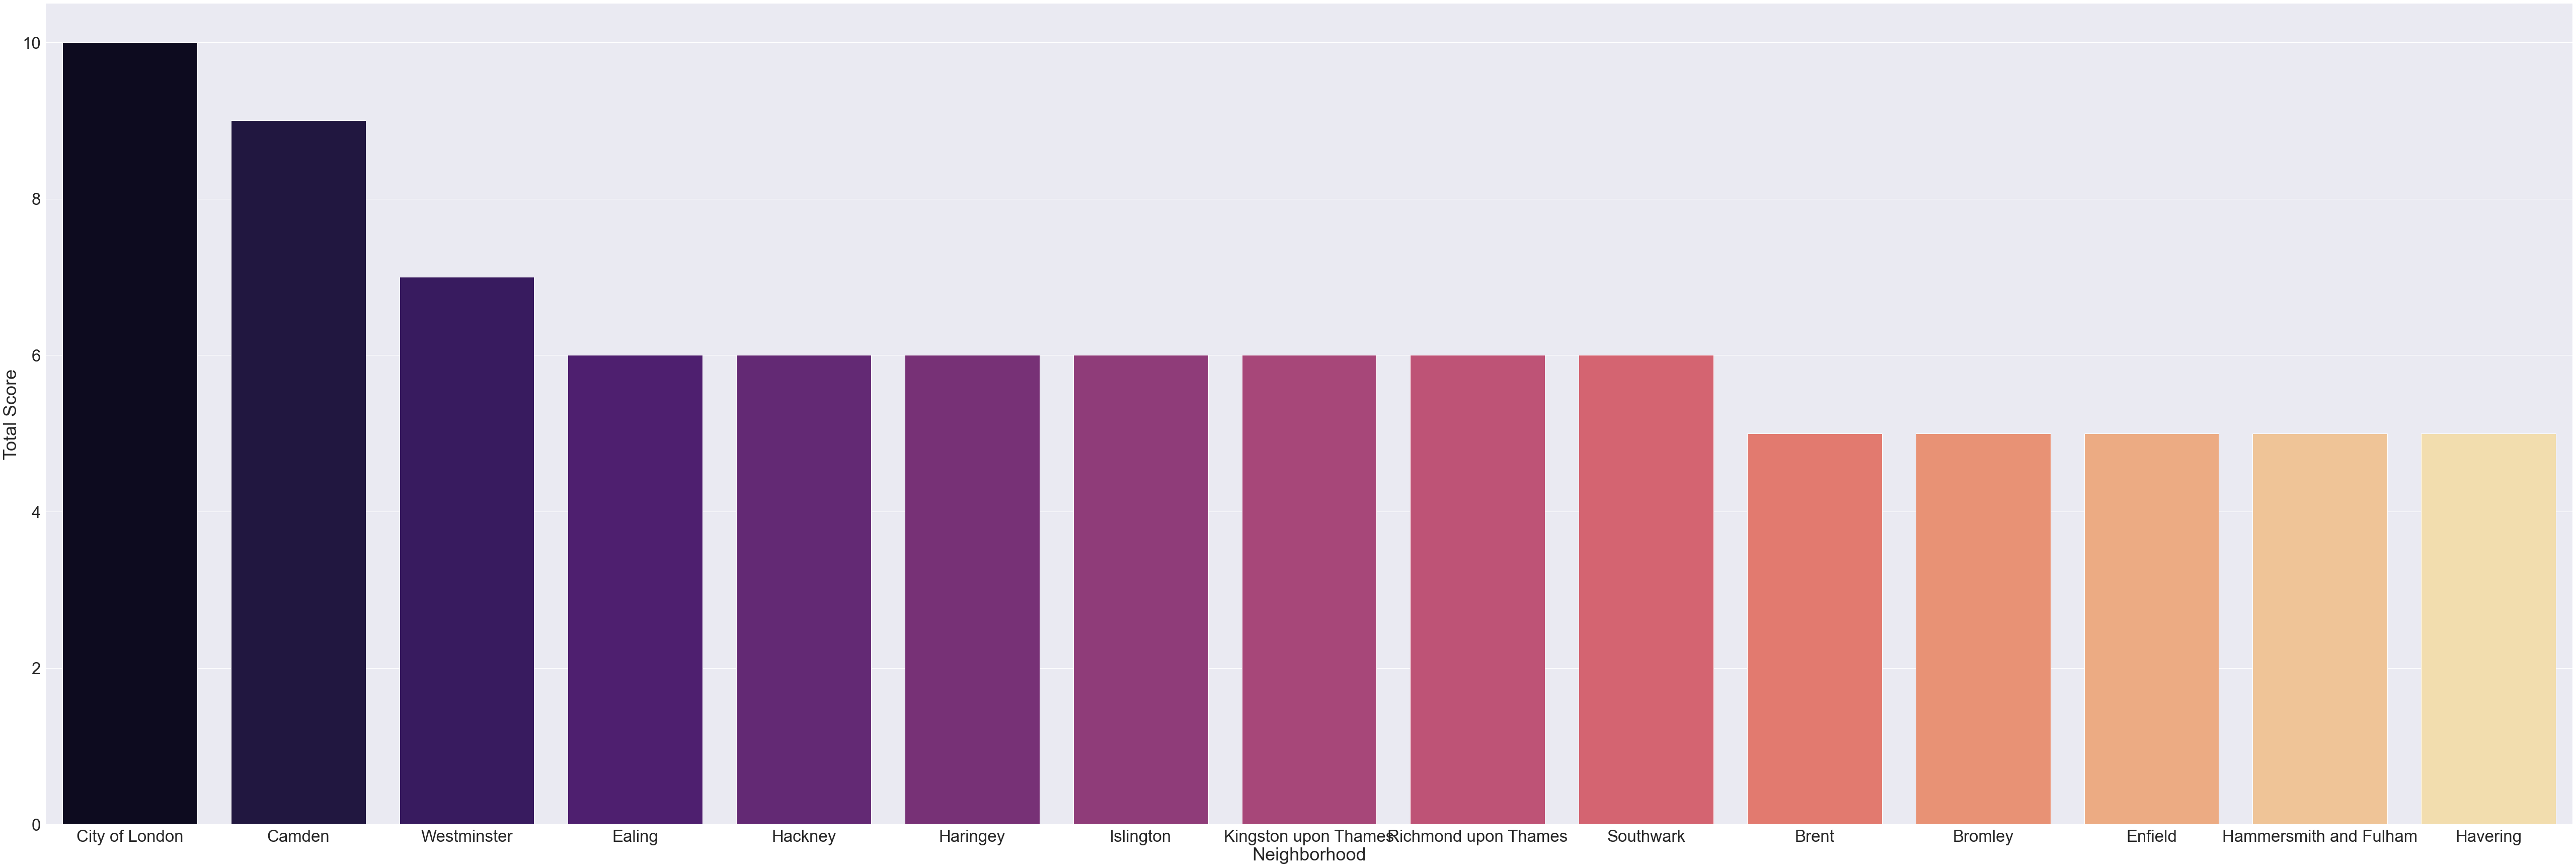

In [225]:
# We can first graph out the top ten scores per area
df_top15_life = df_grouped.nlargest(15, 'Total Score')
sns.set(rc={'figure.figsize':(90,30)})
sns.set(font_scale=3)
ax = sns.barplot(data=df_top15_life, x='Neighborhood', y='Total Score', order=df_top15_life.sort_values('Total Score', ascending=False).Neighborhood, palette = 'magma')

Once we superimpose the "Family friendly" data points (Green) on the Education data points (Yellow), we can immediately visualise areas in London that have both a highly-rated education network as well as the required family-friendly attractions. 

In [242]:
#now that we have the scores for each key area, we can put them in the map
# add markers to map
for lat, lng, Borough in zip(df_top15_life['Latitude'], df_top15_life['Longitude'], df_top15_life['Neighborhood']):
    label = '{}'.format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=1,
        parse_html=False).add_to(map_london2)  
map_london2

# Results and Conclusions  <a name="results"></a>

Our analysis focuses on and analyses the primary schools across the 33 boroughs in London, UK.  Combining the data with areas of interest young families might find attractive, the analysis aims to recommend areas for raising young families. 

Our first finding, perhaps not surprisingly, is that the proportion of students in independent schools tends to be highest in the wealthiest boroughs in London.  There is almost a perfect overlap between the data. 

Perhaps more surprisingly, our second finding shows that school performance is not correlated with the respective borough's wealth (as measured by personal disposable income).  We would have expected that wealthier areas may also house the best schools (as rated by the UK Education Authority).  Of the top 15 wealthiest areas analysed (of the 33 boroughs), the top 5 wealthiest areas were "at the back of the pack" in terms of school performance. 

As a young family trying to identify in which Borough of London to settle, it is critical to keep in mind that the wealthiest areas may not necessairly have the best-rated schools. 

Once we have identified the set of Boroughs with the best school systems, we then proceeded to pull in "family friendly amenities" (e.g Parks, Event spaces, etc.) using the Foursquare API. Superimposing the data, we are able to review and assess which areas in London have both the required educational network as well as the amenities a young family may choose to enjoy.  

Based on this analysis, we have identified the **City of London ("Downtown")**, **Hammersmith and Fulham**, **Richmond**, **Hackey**, **Camden**, **Southwark** and **Haringey** as the most suitable areas for your families to explore further. As a long-time resident of London, based on anecdotal evidence, the above conclusion seems to be in line with the results of this analysis. 

Obviously, any final analysis would need to include other factors (proximity to work, real estate, etc.), however the analysis gives a strong indication as to where a young family may start looking to explore potential residential areas. 